In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Flatten, Dropout
import numpy as np
from sklearn.metrics import classification_report

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [4]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [5]:
class_names = ['Top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

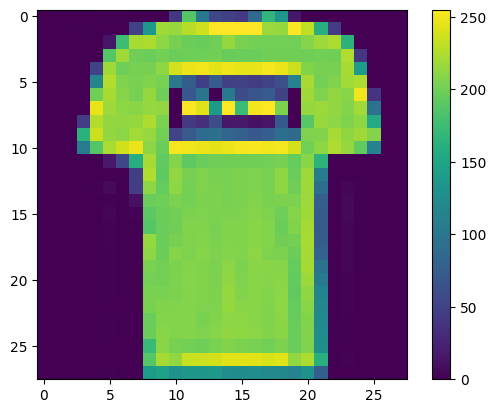

In [6]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

In [7]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [8]:
X_train = X_train.astype('float32')
X_train /= 255.
X_test = X_test.astype('float32')
X_test /= 255.

In [9]:
X_train.shape[1]

28

In [11]:
model = keras.Sequential([
    Flatten(input_shape=(X_train.shape[1], X_train.shape[1])),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(128, activation='relu'),
    Dropout(0.05),
    Dense(10, activation='softmax')
])


In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_6 (Dropout)         (None, 128)              

In [13]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [14]:
model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, epochs=20, batch_size = 64, validation_split=0.2, callbacks=[early_stop])

Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.5727 - accuracy: 0.7944 - val_loss: 0.4129 - val_accuracy: 0.8471
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.4037 - accuracy: 0.8514 - val_loss: 0.3746 - val_accuracy: 0.8652
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3671 - accuracy: 0.8676 - val_loss: 0.3849 - val_accuracy: 0.8623
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3439 - accuracy: 0.8741 - val_loss: 0.3725 - val_accuracy: 0.8642
Epoch 5/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3252 - accuracy: 0.8799 - val_loss: 0.3266 - val_accuracy: 0.8808
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.3081 - accuracy: 0.8856 - val_loss: 0.3318 - val_accuracy: 0.8792
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2989 - accuracy: 0.8899 - val_loss: 0.3413 - val_accuracy: 0.8766
Epoch 

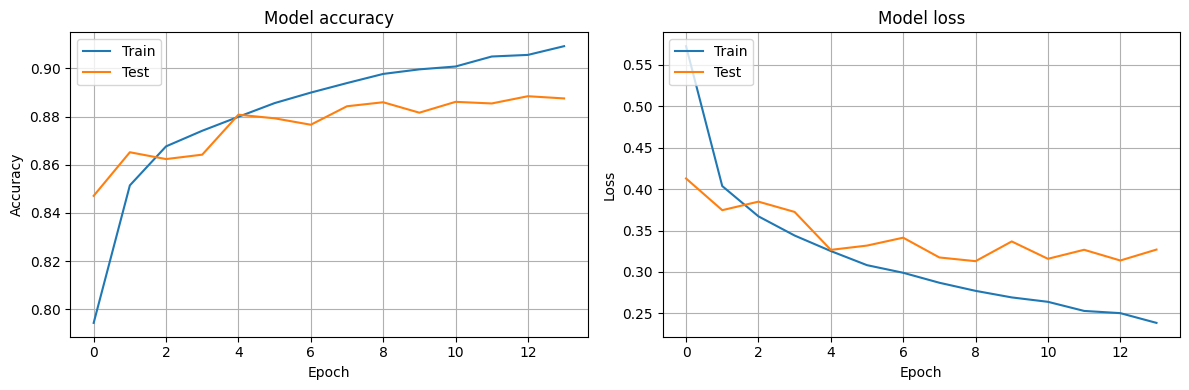

In [16]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()

plt.tight_layout()
plt.show()

In [17]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  

313/313 [==============================] - 0s 652us/step


In [18]:
report = classification_report(y_test, y_pred_classes, target_names=class_names)
print(report)

              precision    recall  f1-score   support

         Top       0.83      0.85      0.84      1000
    Trousers       0.99      0.96      0.98      1000
    Pullover       0.77      0.80      0.78      1000
       Dress       0.88      0.89      0.88      1000
        Coat       0.80      0.73      0.76      1000
      Sandal       0.98      0.95      0.97      1000
       Shirt       0.66      0.69      0.68      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.98      0.96      0.97      1000
  Ankle boot       0.94      0.97      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [96]:
# from keras.layers import Dropout, Dense, Flatten, BatchNormalization, Activation

# from keras.callbacks import EarlyStopping

# input_shape = (28, 28)

# dropout_rates = [0.045, 0.05, 0.055]
# num_dense_layers = [2, 3]


# for dropout_rate in dropout_rates:
#         for num_dense_layer in num_dense_layers:
#             # Створення моделі
#             model = keras.Sequential()
#             model.add(Flatten(input_shape=input_shape))

#             for _ in range(num_dense_layer):
#                 model.add(Dense(128, activation='relu'))
#                 model.add(Dropout(dropout_rate))

            
#             model.add(Dense(10, activation='softmax'))
            
#             model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.001), 
#                           loss='sparse_categorical_crossentropy', 
#                           metrics=['accuracy'])
            
#             early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#             history = model.fit(X_train, y_train, epochs=50,  # збільшимо максимальну кількість епох
#                         batch_size=64, validation_split=0.2, 
#                         verbose=0, callbacks=[early_stop])

#             train_accuracy = history.history['accuracy'][-1]
#             test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
            
#             print(f"Dropout: {dropout_rate}, num_dense_layer {num_dense_layer}")
#             print(f"Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")
#             print(f"Навчання було зупинено на {early_stop.stopped_epoch}-й епосі.\n")





Dropout: 0.045, num_dense_layer 2
Train Accuracy: 0.9200, Test Accuracy: 0.8877
Навчання було зупинено на 16-й епосі.

Dropout: 0.045, num_dense_layer 3
Train Accuracy: 0.9197, Test Accuracy: 0.8834
Навчання було зупинено на 16-й епосі.

Dropout: 0.05, num_dense_layer 2
Train Accuracy: 0.9246, Test Accuracy: 0.8854
Навчання було зупинено на 18-й епосі.

Dropout: 0.05, num_dense_layer 3
Train Accuracy: 0.9137, Test Accuracy: 0.8794
Навчання було зупинено на 14-й епосі.

Dropout: 0.055, num_dense_layer 2
Train Accuracy: 0.9162, Test Accuracy: 0.8794
Навчання було зупинено на 14-й епосі.

Dropout: 0.055, num_dense_layer 3
Train Accuracy: 0.9141, Test Accuracy: 0.8819
Навчання було зупинено на 14-й епосі.

Найкраща модель має точність на валідаційному наборі: 0.0
